In [33]:
import numpy as np
from numpy.linalg import norm
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

class Kmeans:

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
        return self.error
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

K: 2, SSE = 65.61295238095236
K: 3, SSE = 132.28032954545455
K: 4, SSE = 77.98347811755971
K: 5, SSE = 71.51101834922294
K: 6, SSE = 71.44524662095121
K: 7, SSE = 72.82015141058619
K: 8, SSE = 74.18587308377897
K: 9, SSE = 78.46007130124778
K: 10, SSE = 71.44524662095121


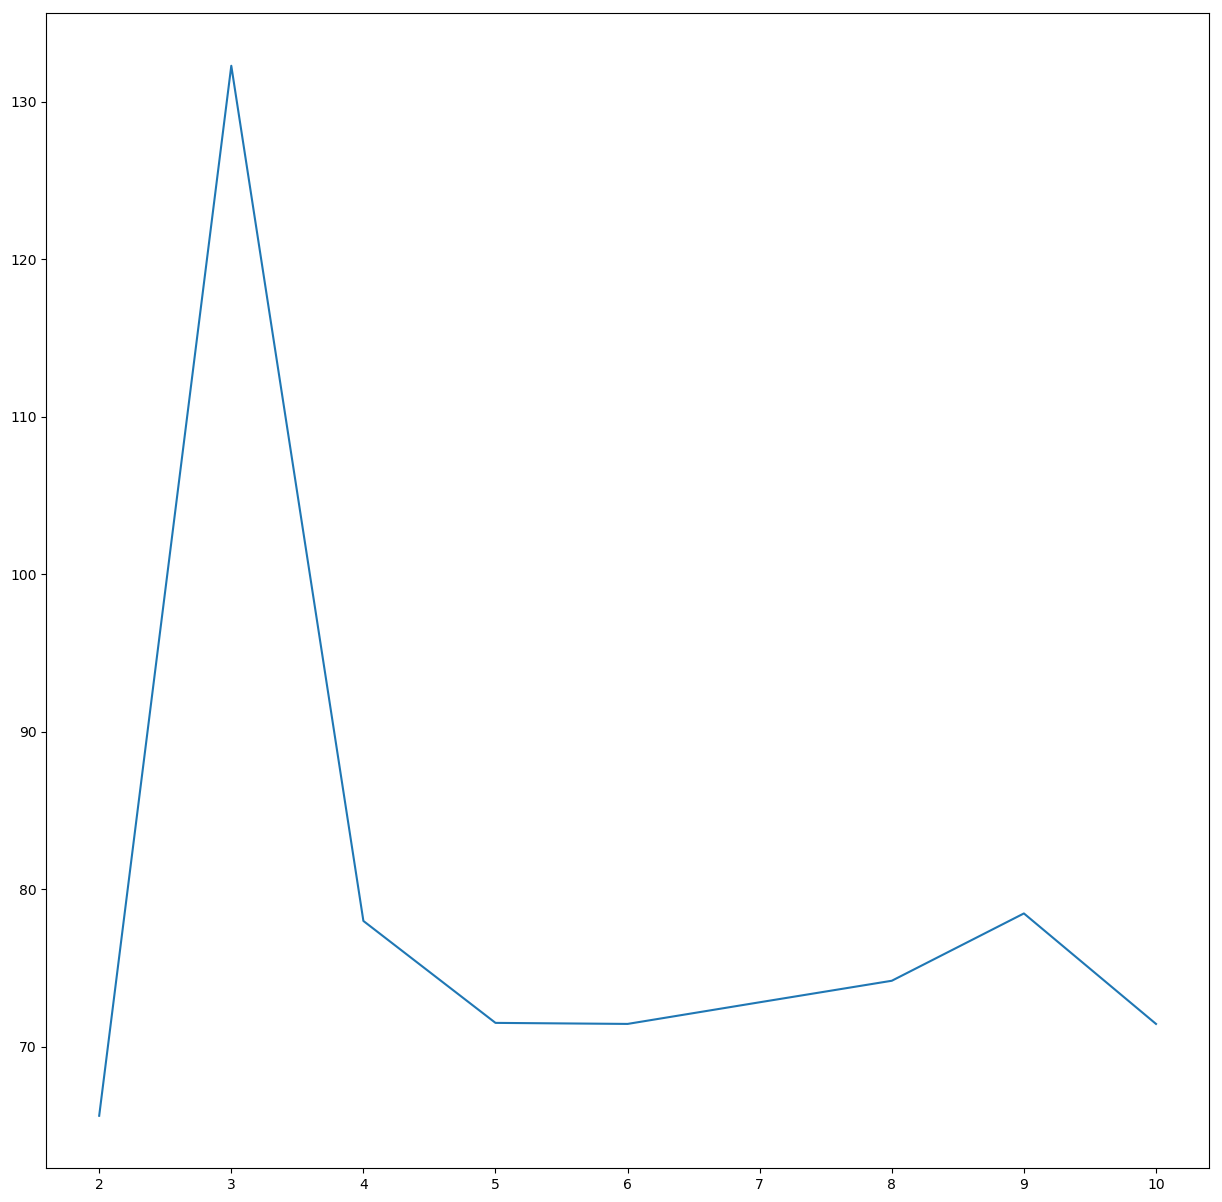

In [37]:
X, _ = load_iris(return_X_y=True)
SSE = list()

for k in range(2, 11):
  model = Kmeans(X.shape[1], k)
  sse = model.fit(X)
  SSE.append(sse)
  print(f"K: {k}, SSE = {sse}")

plt.figure(figsize=(15, 15))
plt.plot([i for i in range(2, 11)], SSE)




K: 2, SSE = 152.34795176035792
K: 3, SSE = 78.85144142614601
K: 4, SSE = 57.228473214285714
K: 5, SSE = 46.472230158730156
K: 6, SSE = 39.054977867477874
K: 7, SSE = 34.3431679723785
K: 8, SSE = 30.1865551948052
K: 9, SSE = 28.38128138528139
K: 10, SSE = 26.06887019508587


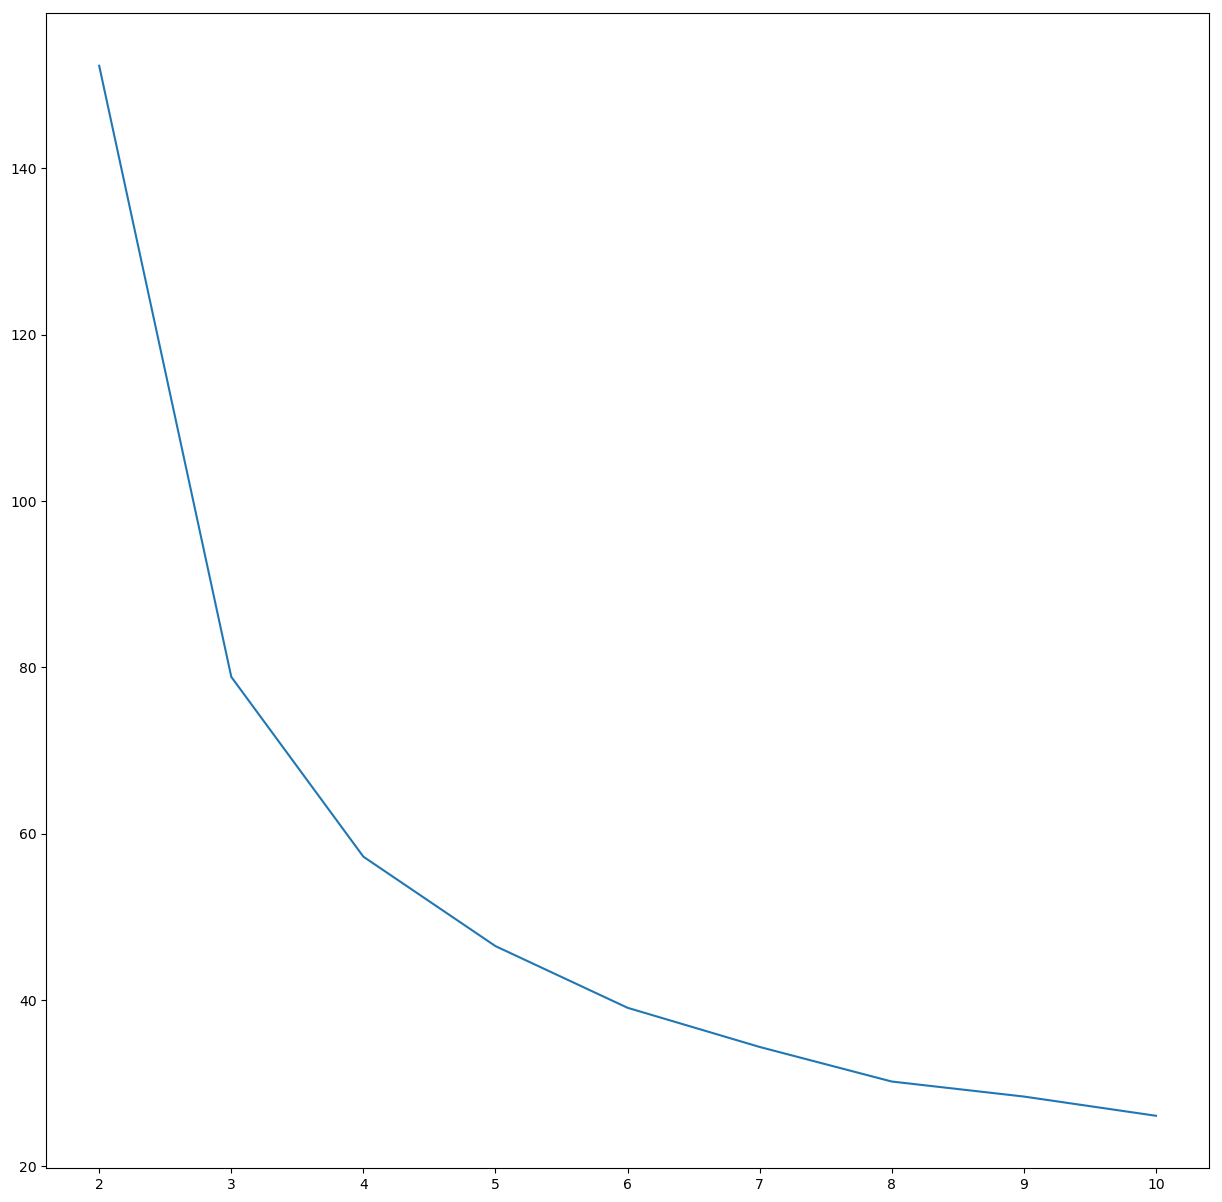

In [35]:
from sklearn.cluster import KMeans
SSE = list()

for k in range(2, 11):
  model = KMeans(n_clusters=k, random_state=13, max_iter=3000).fit(X)
  sse = model.inertia_
  SSE.append(sse)
  print(f"K: {k}, SSE = {sse}")

plt.figure(figsize=(15, 15))
plt.plot([i for i in range(2, 11)], SSE)